# Creating Lattices
Creating a lattice is relatively simple, first we need the 

In [7]:
import ncdl
import torch

from ncdl import Lattice, LatticeTensor
from utility import visualize_lattice

It's recommended to specify shorthand strings for the lattice you want. See the documentation for what each of these create. 

In [2]:
qc = Lattice("qc")
bcc = Lattice("bcc")

Next, let's create a lattice tensor with some random data.


In [3]:
blue_coset = torch.rand(4, 3, 4, 4)
orange_coset = torch.rand(4, 3, 4, 4)

lt = qc(
    blue_coset, 
    orange_coset
) 

Let's visualize the point structure of this lattice tensor

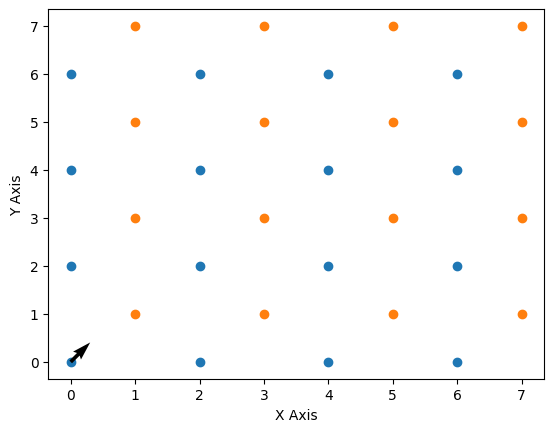

In [4]:
visualize_lattice(lt)

The default lattice factory takes lattices in their lexical coset ordering (with coset vectors strictly positive). It's less ambiguous to specify the exact offsets of each of the cosets.

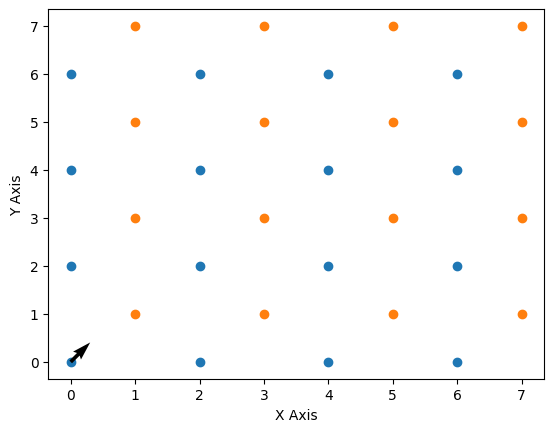

In [5]:
lt_a = qc({
    (0,0):blue_coset, 
    (1,1):orange_coset
}) 
visualize_lattice(lt_a)

We can re-arrange the lattice tensor's cosets in the factory's arguments

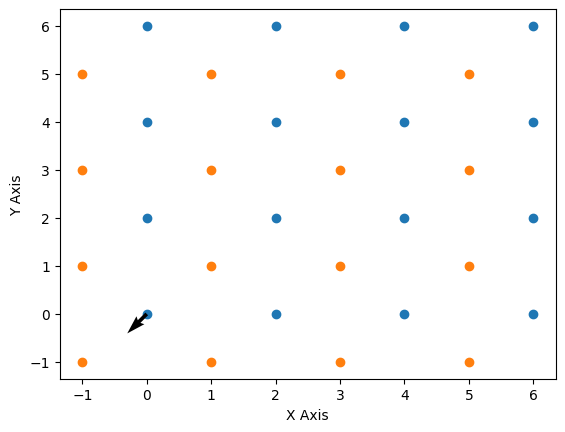

In [11]:
lt_b = qc({
    (0,0):blue_coset, 
    (-1,-1):orange_coset
}) 
visualize_lattice(lt_b)

These two lattice tensors are compatible (they have the same point structure), so we should be able to add them

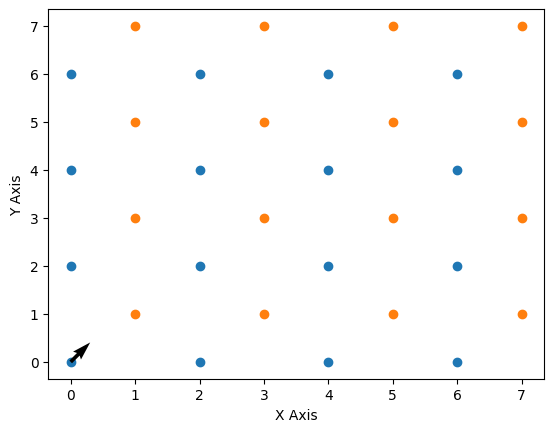

In [14]:
visualize_lattice(lt_a + lt_b)

While the whole concept of lattice tensors may seem overly complicated, it's the only structure I could find that has the robustness that I want for this application. For example, take the following lattice tensor

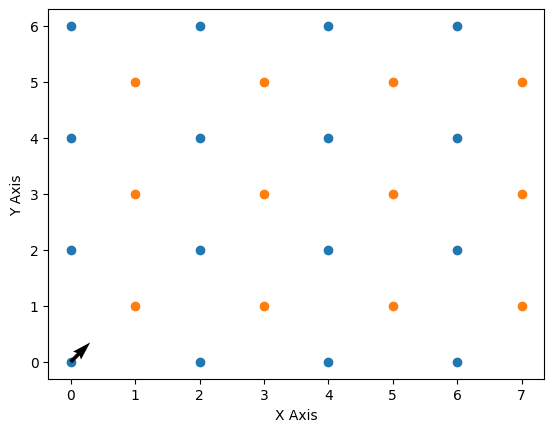

In [16]:
blue_coset = torch.rand(4, 3, 4, 4)
orange_coset = torch.rand(4, 3, 4, 3)

lt = qc(
    blue_coset, 
    orange_coset
) 
visualize_lattice(lt)

It's simply not possible to pack the above into a single square array without wasting space. As the resolution of such a shape increases, wasted space also increases. Furthermore, lattice tensor padding, convolution, etc... are all well defined with the lattice tensor.

If you want to look at the raw data backing each of these cosets, and/or their coset shift vector, you can do this via:

In [6]:
lt.coset(0), lt.coset_vectors[0]

(tensor([[[[3.1025e-01, 5.8482e-02, 7.0005e-01, 2.0329e-01],
           [4.8614e-01, 6.2058e-01, 3.2471e-01, 7.2096e-03],
           [1.4524e-01, 2.2454e-01, 1.3681e-01, 4.3745e-01],
           [6.1681e-01, 3.9208e-01, 9.9335e-01, 5.6048e-01]],
 
          [[5.5312e-01, 1.5807e-01, 6.7697e-01, 4.5332e-01],
           [3.3121e-01, 3.5433e-01, 9.4171e-01, 7.1549e-01],
           [9.5274e-01, 3.9868e-01, 7.6944e-01, 9.5557e-01],
           [2.8293e-01, 2.6959e-01, 1.0788e-01, 9.7630e-01]],
 
          [[1.7184e-02, 7.7817e-01, 3.4885e-01, 9.3150e-01],
           [3.7905e-01, 1.7864e-01, 6.5286e-01, 1.7481e-01],
           [7.9066e-01, 4.9792e-02, 7.9599e-01, 6.4174e-01],
           [4.4631e-01, 8.3688e-01, 8.2376e-01, 6.6084e-01]]],
 
 
         [[[6.6245e-01, 4.4483e-01, 7.0099e-01, 6.2710e-01],
           [2.0432e-01, 8.7294e-01, 3.2481e-01, 6.5082e-01],
           [5.8476e-01, 5.0413e-01, 1.0122e-01, 2.1248e-01],
           [2.5437e-01, 3.9101e-01, 4.9057e-01, 9.4120e-01]],
 
         

We'll end this example with a 3d lattice tensor.

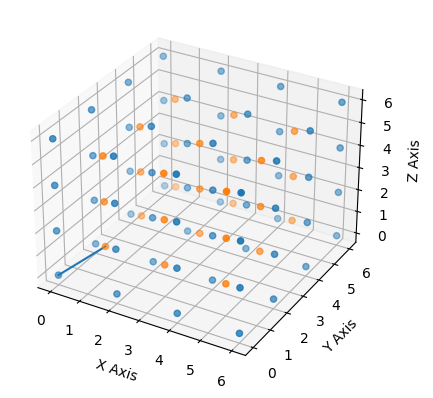

In [19]:

lt = bcc(
    torch.rand(4, 3, 4, 4, 4), 
    torch.rand(4, 3, 3, 3, 3)
)
visualize_lattice(lt)